['.config', 'drive', 'sample_data']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
age:			age
sex:			1: male, 0: female
cp:			chest pain 

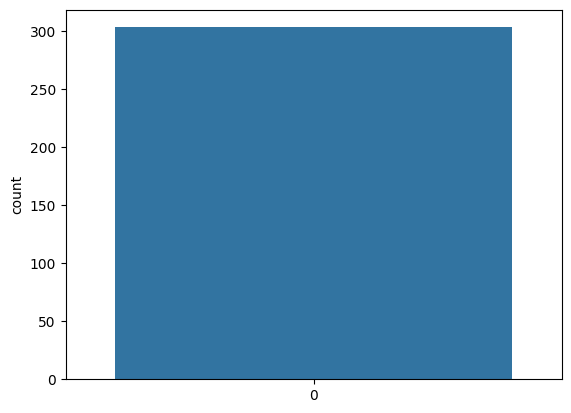

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount("/content/drive")

dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv', delimiter = ',')

type(dataset)

#Shape of dataset
dataset.shape

#Printing out a few columns
dataset.head(5)

#dataset.sample(5)

#Description
dataset.describe()

dataset.info()

info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

#Analysing the 'target' variable
dataset["target"].describe()

dataset["target"].unique()

#Clearly, this is a classification problem, with the target variable having values '0' and '1'
#Checking correlation between columns
print(dataset.corr()["target"].abs().sort_values(ascending=False))

#Exploratory Data Analysis (EDA)

y = dataset["target"]

sns.countplot(y)

target_temp = dataset.target.value_counts()

print(target_temp)


print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

X_train.shape

X_test.shape

Y_train.shape

Y_test.shape

(61,)

In [10]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)
Y_pred_lr.shape

score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
precision_lr = round(precision_score(Y_test,Y_pred_lr)*100,2)
recall_lr = round(recall_score(Y_test,Y_pred_lr)*100,2)
f1_lr = round(f1_score(Y_test,Y_pred_lr)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
print("The precision score achieved using Logistic Regression is: "+str(precision_lr)+" %")
print("The recall score achieved using Logistic Regression is: "+str(recall_lr)+" %")
print("The f1 score achieved using Logistic Regression is: "+str(f1_lr)+" %")
print()

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)
Y_pred_nb.shape

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
precision_nb = round(precision_score(Y_test,Y_pred_nb)*100,2)
recall_nb = round(recall_score(Y_test,Y_pred_nb)*100,2)
f1_nb = round(f1_score(Y_test,Y_pred_nb)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")
print("The precision score achieved using Naive Bayes is: "+str(precision_nb)+" %")
print("The recall score achieved using Naive Bayes is: "+str(recall_nb)+" %")
print("The f1 score achieved using Naive Bayes is: "+str(f1_nb)+" %")
print()

#SVM
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
precision_svm= round(precision_score(Y_test,Y_pred_svm)*100,2)
recall_svm = round(recall_score(Y_test,Y_pred_svm)*100,2)
f1_svm = round(f1_score(Y_test,Y_pred_svm)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")
print("The precision score achieved using Linear SVM is: "+str(precision_svm)+" %")
print("The recall score achieved using Linear SVM is: "+str(recall_svm)+" %")
print("The f1 score achieved using Linear SVM is: "+str(f1_svm)+" %")
print()

#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
precision_knn= round(precision_score(Y_test,Y_pred_knn)*100,2)
recall_knn = round(recall_score(Y_test,Y_pred_knn)*100,2)
f1_knn = round(f1_score(Y_test,Y_pred_knn)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
print("The precision score achieved using KNN is: "+str(precision_knn)+" %")
print("The recall score achieved using KNN is: "+str(recall_knn)+" %")
print("The f1 score achieved using KNN is: "+str(f1_knn)+" %")
print()

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
#print(Y_pred_dt.shape)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
precision_dt= round(precision_score(Y_test,Y_pred_dt)*100,2)
recall_dt = round(recall_score(Y_test,Y_pred_dt)*100,2)
f1_dt = round(f1_score(Y_test,Y_pred_dt)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
print("The precision score achieved using Decision Tree is: "+str(precision_dt)+" %")
print("The recall score achieved using Decision Tree is: "+str(recall_dt)+" %")
print("The f1 score achieved using Decision Tree is: "+str(f1_dt)+" %")
print()

#Random Forest
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf.shape

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
precision_rf= round(precision_score(Y_test,Y_pred_rf)*100,2)
recall_rf = round(recall_score(Y_test,Y_pred_rf)*100,2)
f1_rf = round(f1_score(Y_test,Y_pred_rf)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")
print("The precision score achieved using Random Forest is: "+str(precision_rf)+" %")
print("The recall score achieved using Random Forest is: "+str(recall_rf)+" %")
print("The f1 score achieved using Random Forest is: "+str(f1_rf)+" %")
print()

#XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)
Y_pred_xgb.shape

score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
precision_xgb= round(precision_score(Y_test,Y_pred_xgb)*100,2)
recall_xgb = round(recall_score(Y_test,Y_pred_xgb)*100,2)
f1_xgb = round(f1_score(Y_test,Y_pred_xgb)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")
print("The precision score achieved using XGBoost is: "+str(precision_xgb)+" %")
print("The recall score achieved using XGBoost is: "+str(recall_xgb)+" %")
print("The f1 score achieved using XGBoost is: "+str(f1_xgb)+" %")
print()

The accuracy score achieved using Logistic Regression is: 85.25 %
The precision score achieved using Logistic Regression is: 85.71 %
The recall score achieved using Logistic Regression is: 88.24 %
The f1 score achieved using Logistic Regression is: 86.96 %

The accuracy score achieved using Naive Bayes is: 85.25 %
The precision score achieved using Naive Bayes is: 83.78 %
The recall score achieved using Naive Bayes is: 91.18 %
The f1 score achieved using Naive Bayes is: 87.32 %

The accuracy score achieved using Linear SVM is: 81.97 %
The precision score achieved using Linear SVM is: 81.08 %
The recall score achieved using Linear SVM is: 88.24 %
The f1 score achieved using Linear SVM is: 84.51 %

The accuracy score achieved using KNN is: 67.21 %
The precision score achieved using KNN is: 71.88 %
The recall score achieved using KNN is: 67.65 %
The f1 score achieved using KNN is: 69.7 %

The accuracy score achieved using Decision Tree is: 81.97 %
The precision score achieved using Decisi

In [11]:
!pip install https://github.com/JamesRitchie/scikit-rvm/archive/master.zip
from skrvm import RVC

rvm = RVC()
rvm.fit(X_train, Y_train)
RVC(alpha=1e-06, beta=1e-06, beta_fixed=False, bias_used=True, coef0=0.0,
coef1=None, degree=3, kernel='poly', n_iter=3000, n_iter_posterior=50,
threshold_alpha=1000000000.0, tol=0.001, verbose=False)

Y_pred_rvm = rvm.predict(X_test)
#rvm.score(X_train, Y_train)

score_rvm = round(accuracy_score(Y_pred_rvm,Y_test)*100,2)
precision_rvm = round(precision_score(Y_test,Y_pred_rvm)*100,2)
recall_rvm = round(recall_score(Y_test,Y_pred_rvm)*100,2)
f1_rvm = round(f1_score(Y_test,Y_pred_rvm)*100,2)

print("The accuracy score achieved using RVM is: "+str(score_rvm)+" %")
print("The precision score achieved using RVM is: "+str(precision_rvm)+" %")
print("The recall score achieved using RVM is: "+str(recall_rvm)+" %")
print("The f1 score achieved using RVM is: "+str(f1_rvm)+" %")
print()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 10.8 kB 37.2 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-rvm: filename=scikit_rvm-0.1.0a1-py3-none-any.whl size=4239 sha256=f812bd185680da9e4db094b36b5a35fe7294309bd1bf462b9e84f688134e3cc3
  Stored in directory: /tmp/pip-ephem-wheel-cache-ggizea2l/wheels/38/97/92/d2154117423998a97dee555851d446e94a40de60cb42351729
Successfully built scikit-rvm
The accuracy score achieved using RVM is: 55.74 %
The precision score achieved using RVM is: 55.74 %
The recall score achieved using RVM is: 100.0 %
The f1 score achieved using RVM is: 71.58 %



In [12]:
#Neural Network
from keras.models import Sequential
from keras.layers import Dense

# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=300)


Y_pred_nn = model.predict(X_test)
Y_pred_nn.shape
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)
precision_nn= round(precision_score(Y_test,Y_pred_nn)*100,2)
recall_nn = round(recall_score(Y_test,Y_pred_nn)*100,2)
f1_nn = round(f1_score(Y_test,Y_pred_nn)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")
print("The precision score achieved using Neural Network is: "+str(precision_nn)+" %")
print("The recall score achieved using Neural Network is: "+str(recall_nn)+" %")
print("The f1 score achieved using Neural Network is: "+str(f1_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

Epoch 1/300
8/8 [==============================] - 1s 3ms/step - loss: 23.6303 - accuracy: 0.4587
Epoch 2/300
8/8 [==============================] - 0s 2ms/step - loss: 15.1537 - accuracy: 0.4628
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 6.6187 - accuracy: 0.4793
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 2.8968 - accuracy: 0.6198
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 3.3006 - accuracy: 0.6405
Epoch 6/300
8/8 [==============================] - 0s 3ms/step - loss: 2.8016 - accuracy: 0.6281
Epoch 7/300
8/8 [==============================] - 0s 3ms/step - loss: 2.3689 - accuracy: 0.6322
Epoch 8/300
8/8 [==============================] - 0s 2ms/step - loss: 2.2688 - accuracy: 0.6240
Epoch 9/300
8/8 [==============================] - 0s 3ms/step - loss: 2.1241 - accuracy: 0.6364
Epoch 10/300
8/8 [==============================] - 0s 4ms/step - loss: 2.0471 - accuracy: 0.6612
Epoch 11/300
8/8 [=========

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                154       
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 166
Trainable params: 166
Non-trainable params: 0
_________________________________________________________________
None


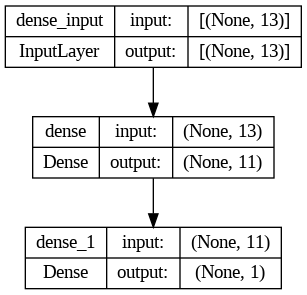

In [14]:
from keras.utils.vis_utils import plot_model
from google.colab import files

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#files.download('model_plot.png')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4179 sha256=4a148835bfda9dc52bbeca267c468d1cef0b64d5fcf76aea309af1c51f0655da
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


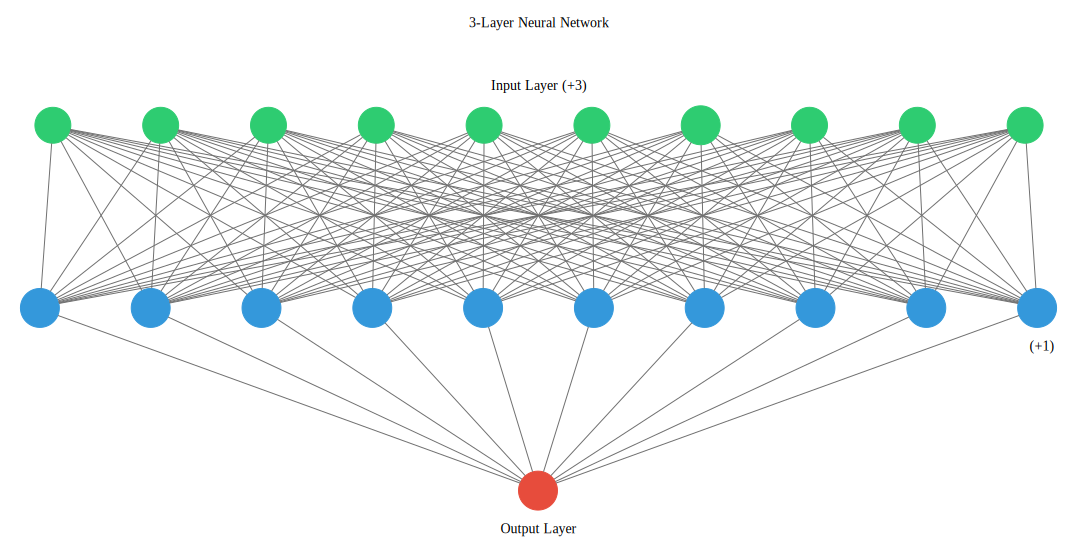

In [15]:
!pip install ann_visualizer
from ann_visualizer.visualize import ann_viz;
import graphviz
from google.colab import files

ann_viz(model,filename='NN_model.gv',title="3-Layer Neural Network")
graph_file=graphviz.Source.from_file('NN_model.gv')
graph_file
#files.download()

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 78.69 %
The accuracy score achieved using Neural Network is: 81.97 %
The accuracy score achieved using Relevance Vector Machine is: 55.74 %
The accuracy score achieved using EM Clustering with SVM is: 98.9 %


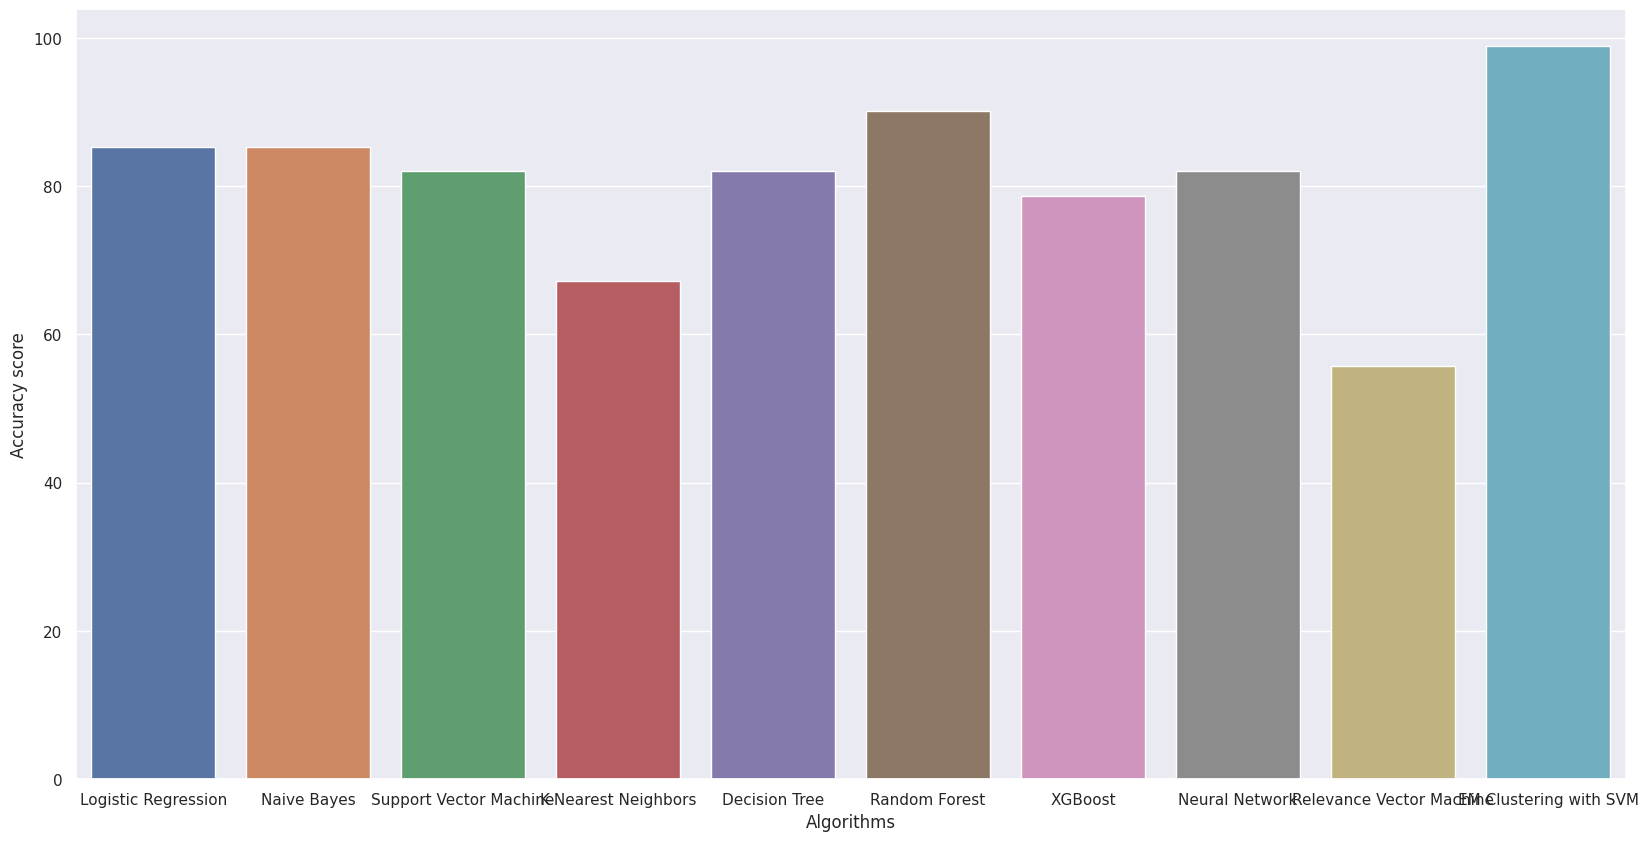


The precision score achieved using Logistic Regression is: 85.71 %
The precision score achieved using Naive Bayes is: 83.78 %
The precision score achieved using Support Vector Machine is: 81.08 %
The precision score achieved using K-Nearest Neighbors is: 71.88 %
The precision score achieved using Decision Tree is: 84.85 %
The precision score achieved using Random Forest is: 88.89 %
The precision score achieved using XGBoost is: 81.82 %
The precision score achieved using Neural Network is: 84.85 %
The precision score achieved using Relevance Vector Machine is: 55.74 %
The precision score achieved using EM Clustering with SVM is: 100 %


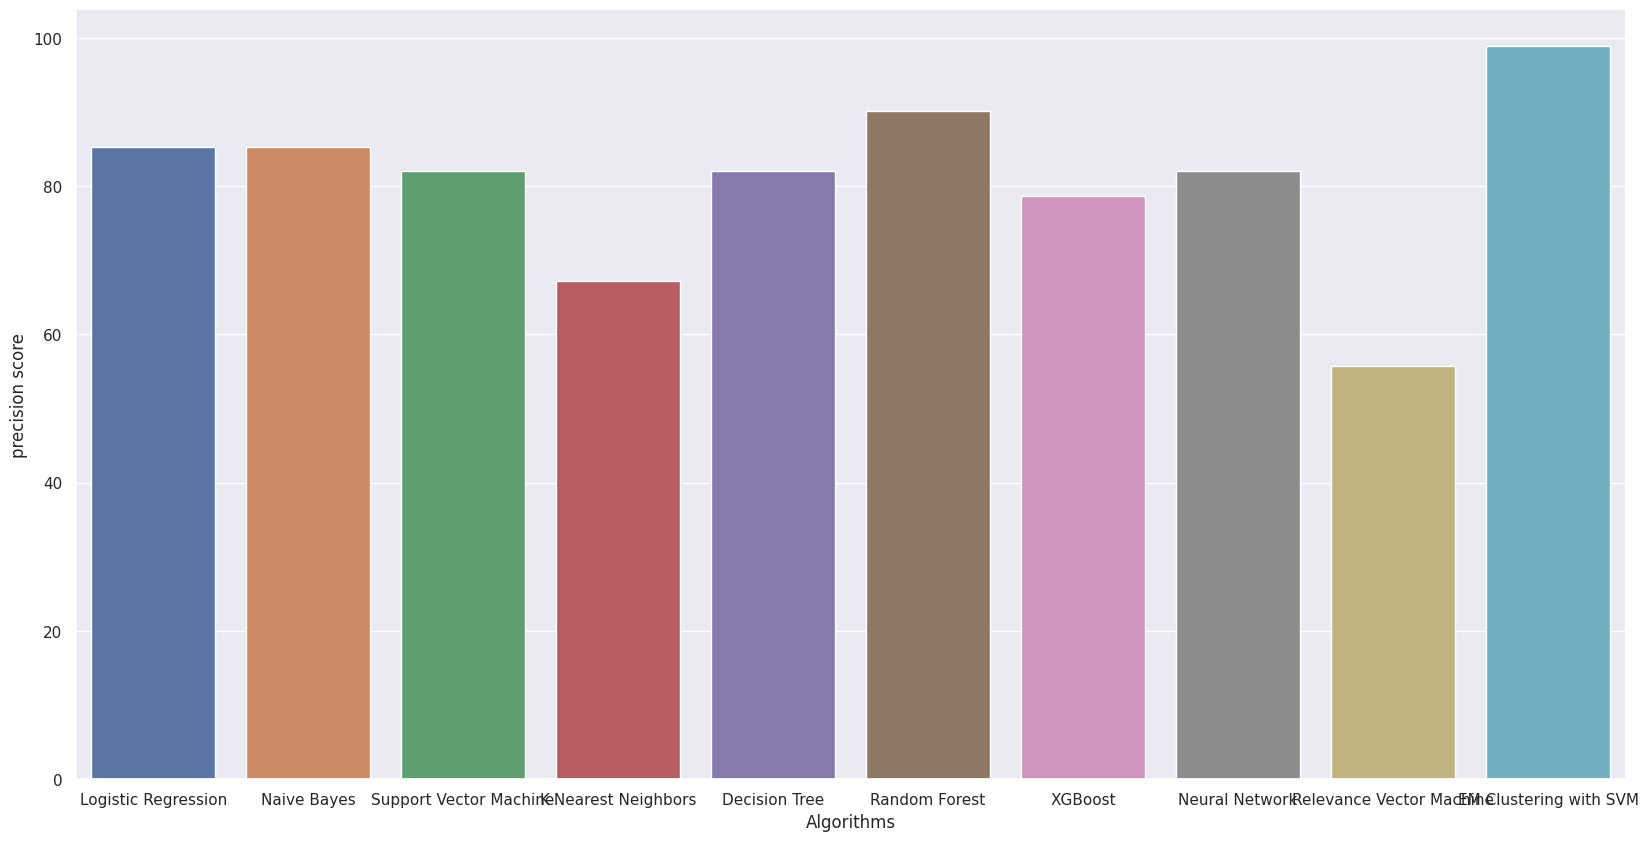


The recall score achieved using Logistic Regression is: 88.24 %
The recall score achieved using Naive Bayes is: 91.18 %
The recall score achieved using Support Vector Machine is: 88.24 %
The recall score achieved using K-Nearest Neighbors is: 67.65 %
The recall score achieved using Decision Tree is: 82.35 %
The recall score achieved using Random Forest is: 94.12 %
The recall score achieved using XGBoost is: 79.41 %
The recall score achieved using Neural Network is: 82.35 %
The recall score achieved using Relevance Vector Machine is: 100.0 %
The recall score achieved using EM Clustering with SVM is: 97.5 %


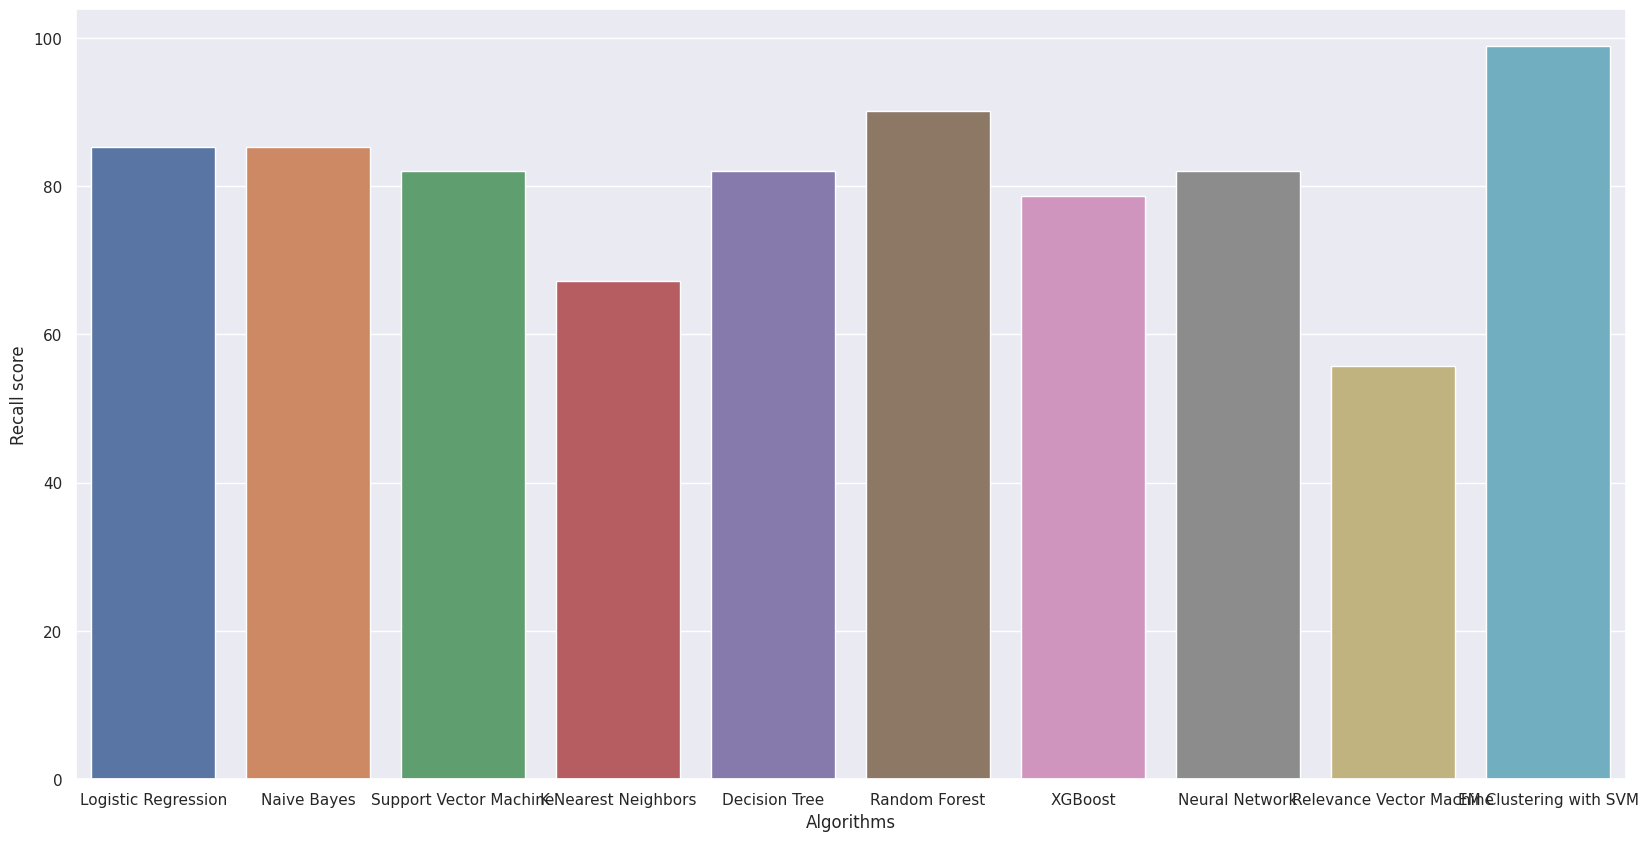


The f1 score achieved using Logistic Regression is: 86.96 %
The f1 score achieved using Naive Bayes is: 87.32 %
The f1 score achieved using Support Vector Machine is: 84.51 %
The f1 score achieved using K-Nearest Neighbors is: 69.7 %
The f1 score achieved using Decision Tree is: 83.58 %
The f1 score achieved using Random Forest is: 91.43 %
The f1 score achieved using XGBoost is: 80.6 %
The f1 score achieved using Neural Network is: 83.58 %
The f1 score achieved using Relevance Vector Machine is: 71.58 %
The f1 score achieved using EM Clustering with SVM is: 98.73 %


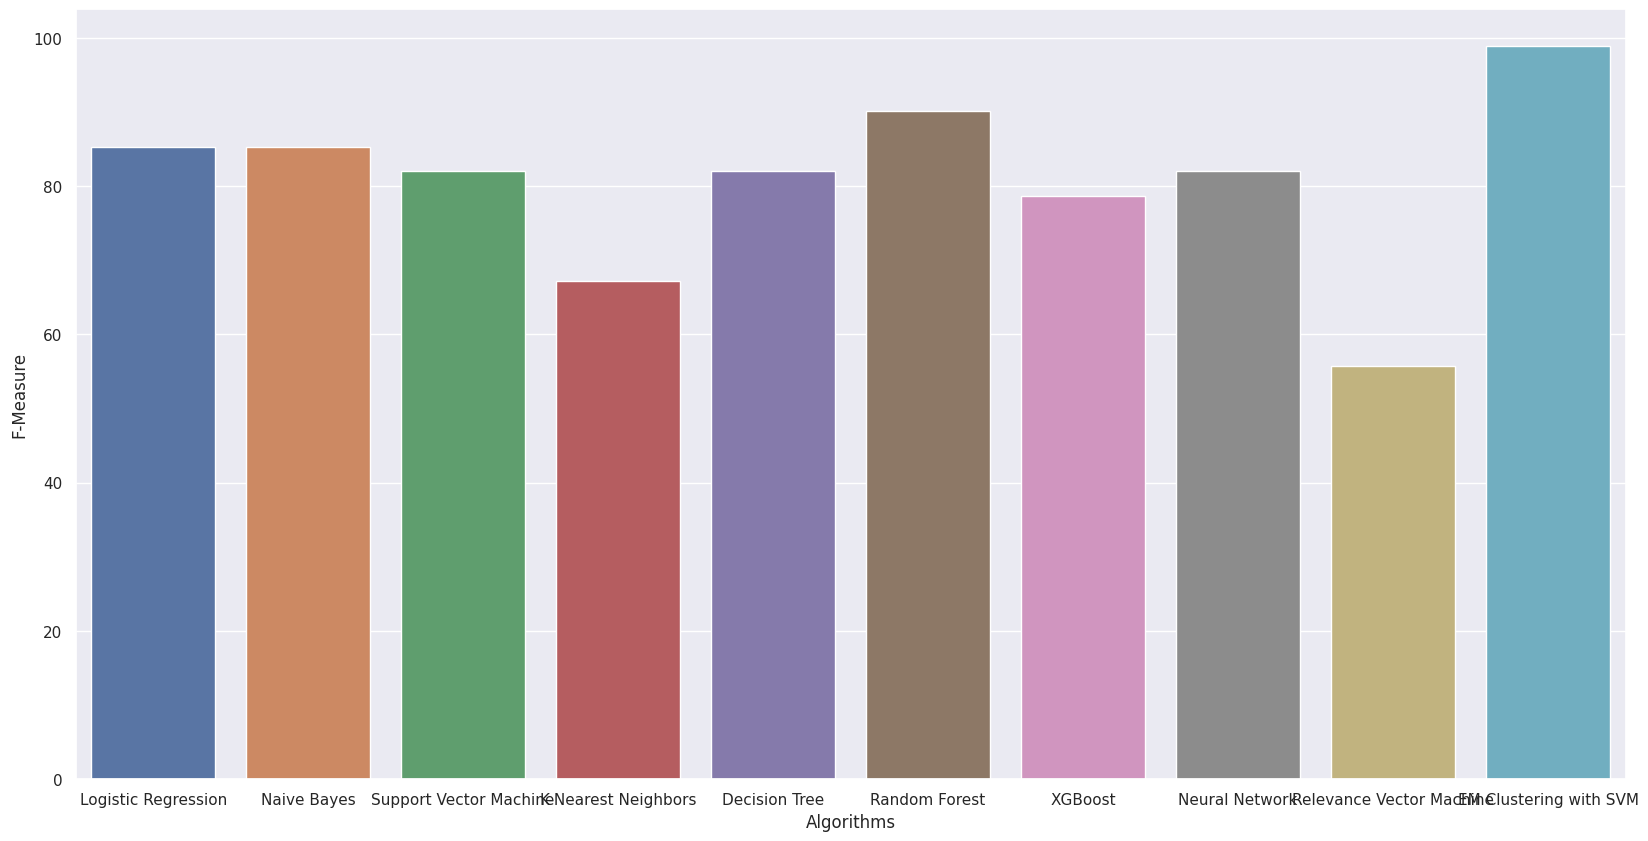

In [18]:
#VI. Output final score
acc_scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn,score_rvm]
pre_scores = [precision_lr,precision_nb,precision_svm,precision_knn,precision_dt,precision_rf,precision_xgb,precision_nn,precision_rvm]
rec_scores = [recall_lr,recall_nb,recall_svm,recall_knn,recall_dt,recall_rf,recall_xgb,recall_nn,recall_rvm]
f1_scores = [f1_lr,f1_nb,f1_svm,f1_knn,f1_dt,f1_rf,f1_xgb,f1_nn,f1_rvm]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network","Relevance Vector Machine"]
algorithms.append("EM Clustering with SVM")    

score_proposed = 98.90
precision_proposed = 100
recall_proposed = 97.50
f1_proposed = 98.73

acc_scores.append(score_proposed)
pre_scores.append(precision_proposed)
rec_scores.append(recall_proposed)
f1_scores.append(f1_proposed)

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(acc_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms,y=acc_scores)
plt.show()

print()

for i in range(len(algorithms)):
    print("The precision score achieved using "+algorithms[i]+" is: "+str(pre_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("precision score")
sns.barplot(x=algorithms,y=acc_scores)
plt.show()

print()

for i in range(len(algorithms)):
    print("The recall score achieved using "+algorithms[i]+" is: "+str(rec_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Recall score")
sns.barplot(x=algorithms,y=acc_scores)
plt.show()

print()

for i in range(len(algorithms)):
    print("The f1 score achieved using "+algorithms[i]+" is: "+str(f1_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("F-Measure")
sns.barplot(x=algorithms,y=acc_scores)
plt.show()

print()

In [19]:
eval_scores = pd.DataFrame(list(zip(acc_scores,pre_scores,rec_scores,f1_scores)),index=algorithms,columns=['accuracy','precision','recall','f1-score'])

<Figure size 3000x3000 with 0 Axes>

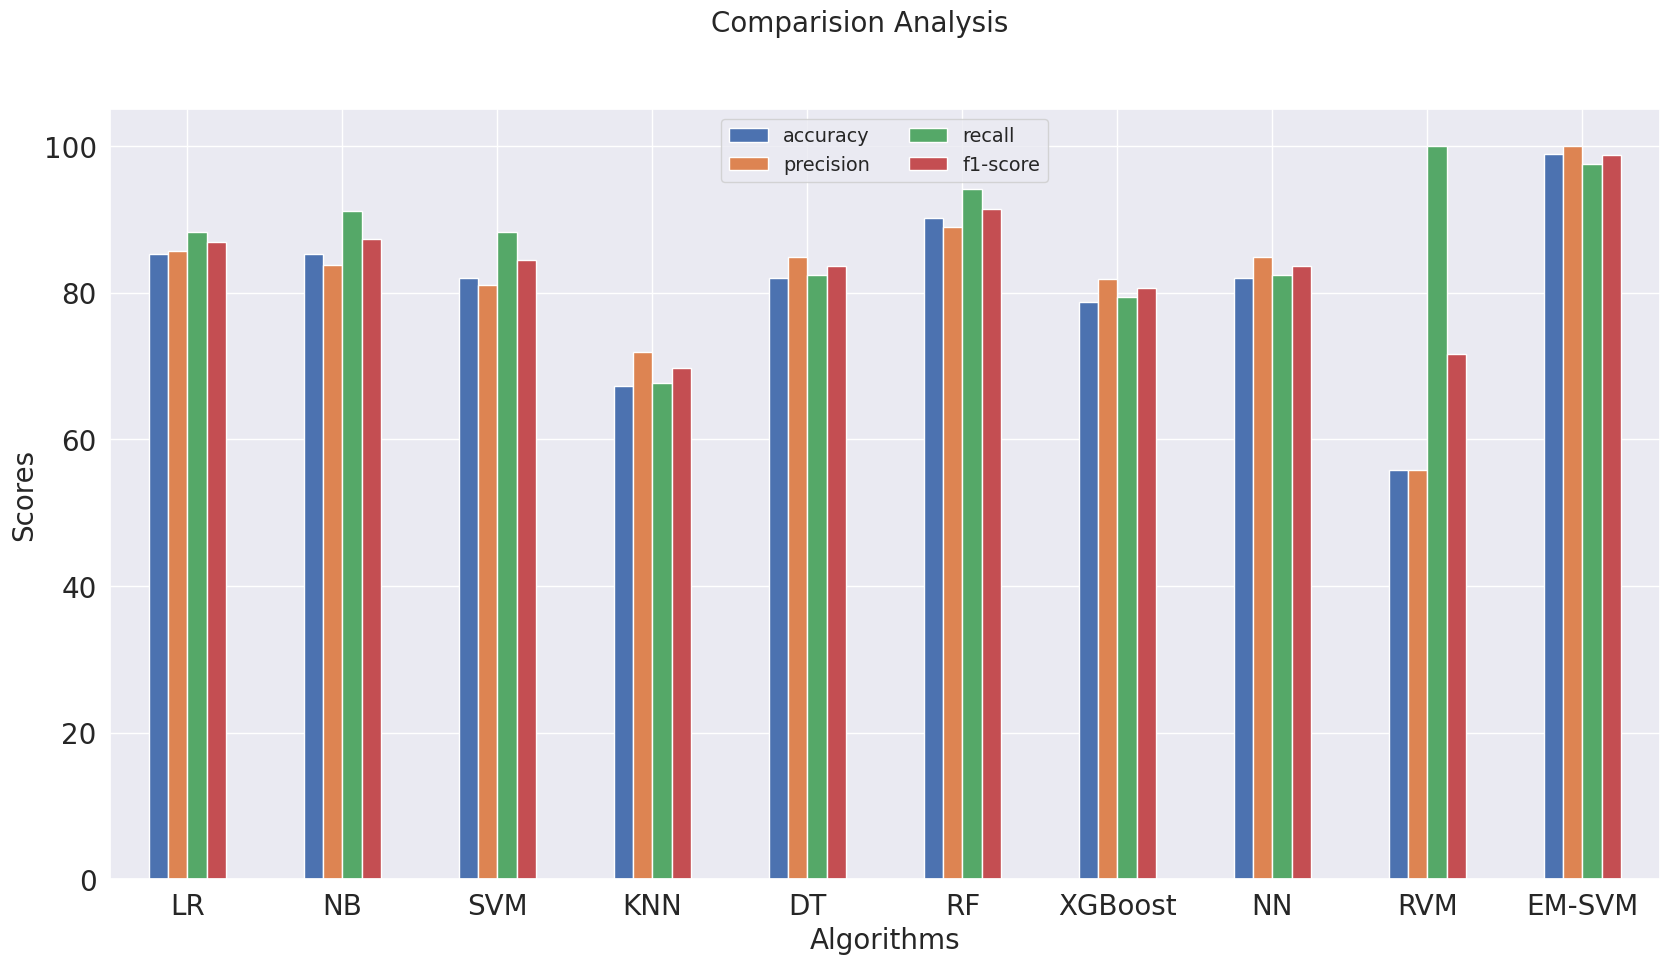

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
 
N = 10
ind = np.arange(N)  
width = 0.25

plt.figure(figsize=(30,30))
eval_scores.plot.bar()
plt.suptitle('Comparision Analysis', fontsize=20)
plt.xlabel("Algorithms", fontsize=20)
plt.ylabel("Scores", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation = 360)
#plt.xticks(ind,('Logistic Regression','Naive Bayes','Support Vector Machine','K-Nearest Neighbors','Decision Tree','Random Forest','XGBoost','Neural Network','EM-SVM'))
plt.xticks(ind,('LR','NB','SVM','KNN','DT','RF','XGBoost','NN','RVM','EM-SVM'))
plt.legend(fontsize = 25)
plt.legend(loc='upper center', prop={'size':13.89}, ncol=2)
plt.savefig('comparision.eps')
plt.show()
files.download('comparision.eps')

<Figure size 1000x1000 with 0 Axes>

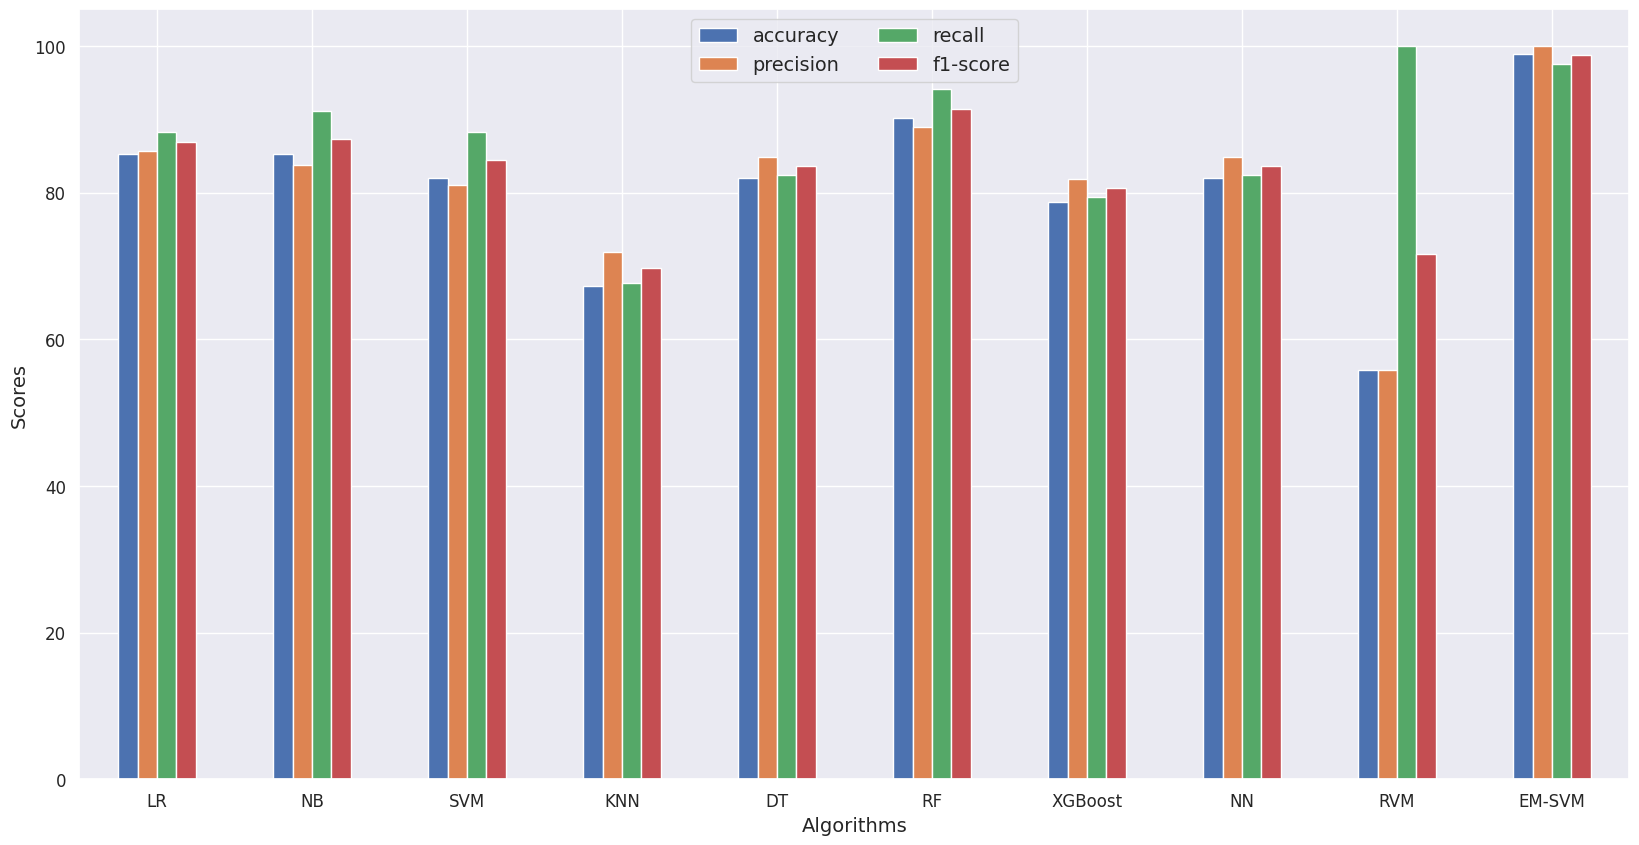

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
 
N = 10
ind = np.arange(N)  
width = 0.25

plt.figure(figsize=(10,10))
eval_scores.plot.bar()
#plt.suptitle('Comparision Analysis', fontsize=20)
plt.xlabel("Algorithms", fontsize=14)
plt.ylabel("Scores", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation = 360)
#plt.xticks(ind,('Logistic Regression','Naive Bayes','Support Vector Machine','K-Nearest Neighbors','Decision Tree','Random Forest','XGBoost','Neural Network','EM-SVM'))
plt.xticks(ind,('LR','NB','SVM','KNN','DT','RF','XGBoost','NN','RVM','EM-SVM'))
plt.legend(fontsize = 12)
plt.legend(loc='upper center', prop={'size':13.89}, ncol=2)
plt.savefig('comparision_scores.eps')
plt.show()
files.download('comparision_scores.eps')

In [23]:
eval_scores.head(10)

,accuracy,precision,recall,f1-score
Logistic Regression,85.25,85.71,88.24,86.96
Naive Bayes,85.25,83.78,91.18,87.32
Support Vector Machine,81.97,81.08,88.24,84.51
K-Nearest Neighbors,67.21,71.88,67.65,69.70
Decision Tree,81.97,84.85,82.35,83.58
Random Forest,90.16,88.89,94.12,91.43
XGBoost,78.69,81.82,79.41,80.60
Neural Network,81.97,84.85,82.35,83.58
Relevance Vector Machine,55.74,55.74,100.00,71.58
EM Clustering with SVM,98.90,100.00,97.50,98.73
